#**Group Name: "    "**
###Member 1: Rodel Yzer C. De Boda
###SR Code: 22-04506

###Member 2: Adhem V. Hernandez
###SR Code: 22-07415

# **Laboratory Activity 2: Applied Classification Analysis**

**In this laboratory we will create an classification algorithm for our gathered classification datasets.**


**Dataset Link:** "https://www.kaggle.com/datasets/erdemtaha/cancer-data/data"

#**Description of the dataset**

Insert Here: "The dataset contains the characteristics of patients diagnosed with cancer. The dataset contains a unique ID for each patient, the type of cancer (diagnosis), the visual characteristics of the cancer and the average values of these characteristics."

# **Import the Required Packages**

For this exercise we will require the Pandas package for loading the data, the matplotlib package for plotting as well as scitkit-learn for creating the Classification model. Import all of the required packages and relevant modules for these tasks.

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import missingno as msno

In [144]:
import numpy as np
from array import array
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score

# **Read the Data**


In [145]:
df = pd.read_csv("/content/Cancer_Data.csv")

## **Read the data and find summary statistics**


Get the info of your dataset

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Get the first five and last five of your dataset

In [147]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [148]:
df.tail(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


Get the summary statistics of your dataset to show the total cont, mean, standard deviation, min and max value, and percentiles of each column of your dataset.

In [149]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# **Data Cleaning**


Visualize the missing values/data in your dataset to see how many data and percentage of data are missing in each column of your dataset.

In [150]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [151]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


Use a nullity matrix for your dataset for easy visualization of missing data

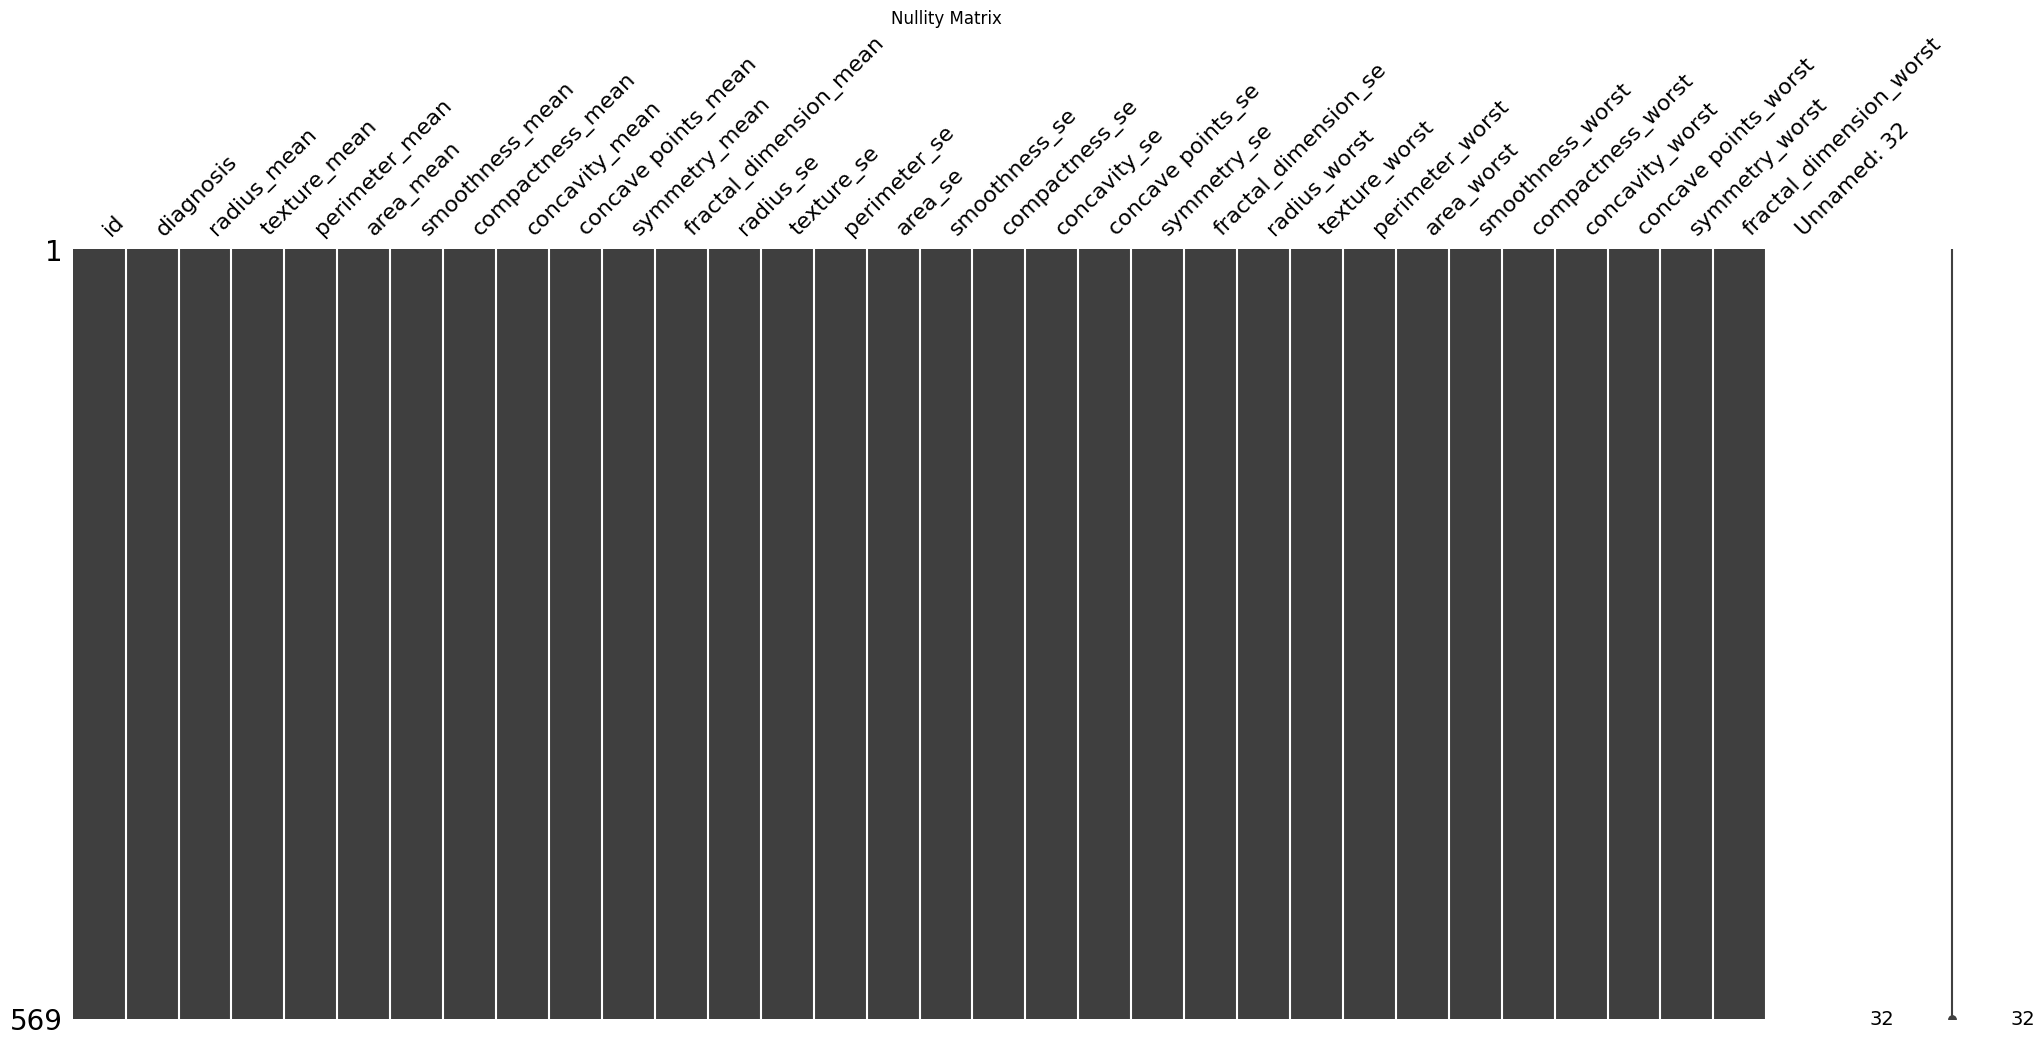

In [152]:
msno.matrix(df)
plt.title('Nullity Matrix')
plt.show()

# **Imputation of data to missing data**


In [153]:
#drop data with 80% missing percentage value
columns_to_drop = df.columns[df.isnull().sum() / len(df) * 100 > 80]
df.drop(columns_to_drop, axis=1, inplace=True)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [154]:
#dropping or deleting columns that is unnecessary
df.drop(['id'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


After deleting the columns with 80% missing data. Impute data/value in the missing data of your dataset.

In [155]:
features = df.columns.drop(['diagnosis'])
for column in features:
  df[column].fillna(df[column].mean(), inplace=True)

<ipython-input-155-ea25aba2fed0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


After imputation of data, Check the completeness of your dataset by getting its info.

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# **Visualize the Data**
Load the dataset using Pandas and plot the different the target category

Plot a number of different features vs the allocated species classifications e.g. Sepal Length vs Petal length and Species. Visually inspect the plots and look for any patterns that could indicate separation between each of the species.

In [157]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

# **Preprocessing**
# **Feature Engineering**

You need to select the most appropriate features that will provide the most powerful classification model.



Before we can construct the model we must first convert the species values into labels that can be used within the model. Replace:


Example:

    1. The species string Iris-setosa with the value 0
    2. The species string Iris-versicolor with the value 1
    3. The species string Iris-virginica with the value 2

You can use get_dummies function / OnehotEncoder / LabelEncoder Library / StandardScaler with this.

In [158]:
features

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [159]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)

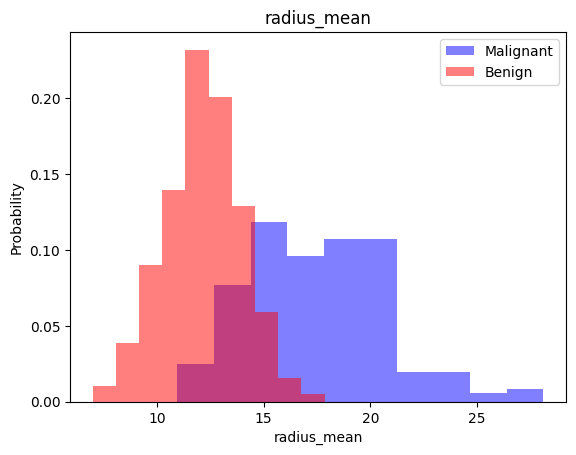

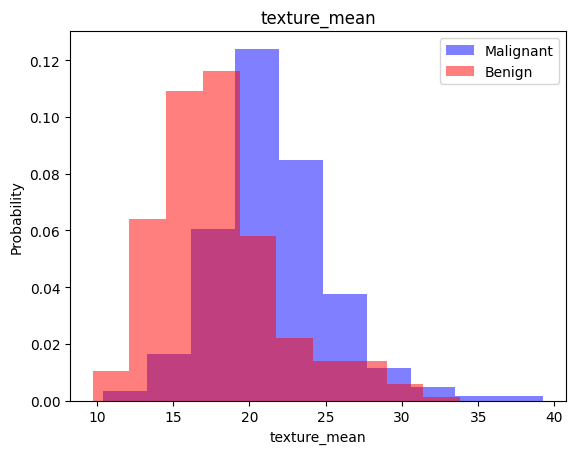

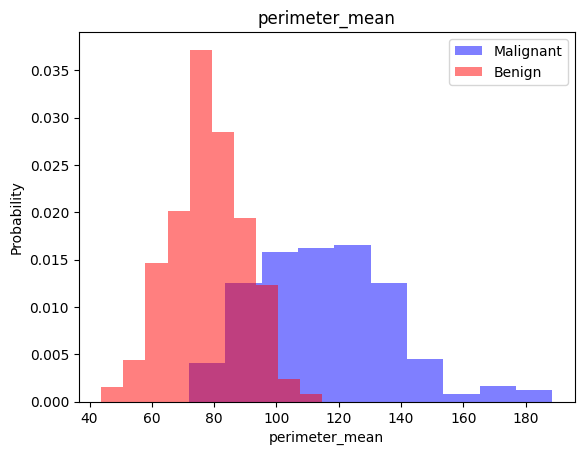

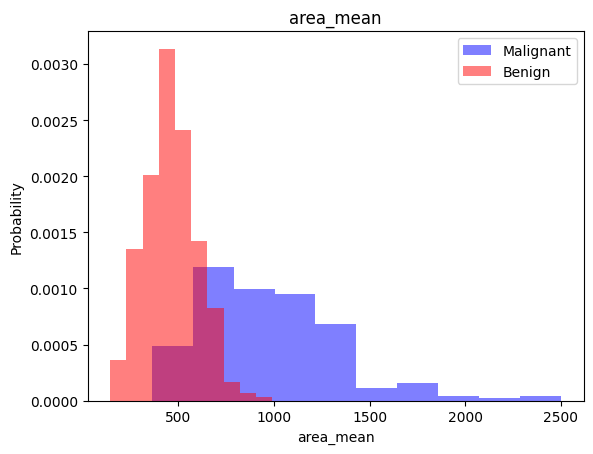

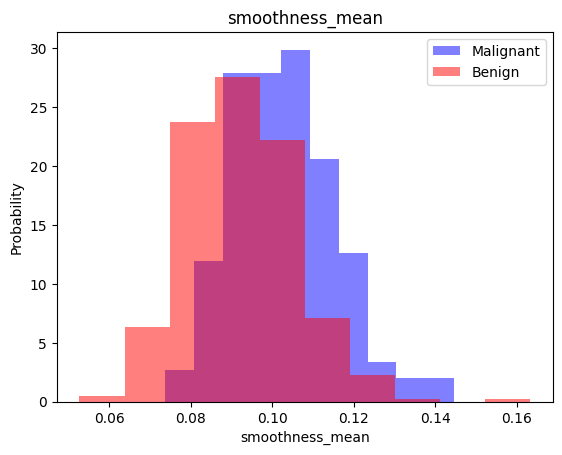

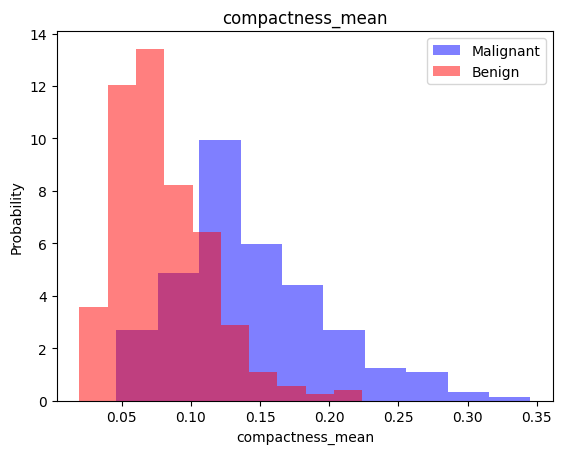

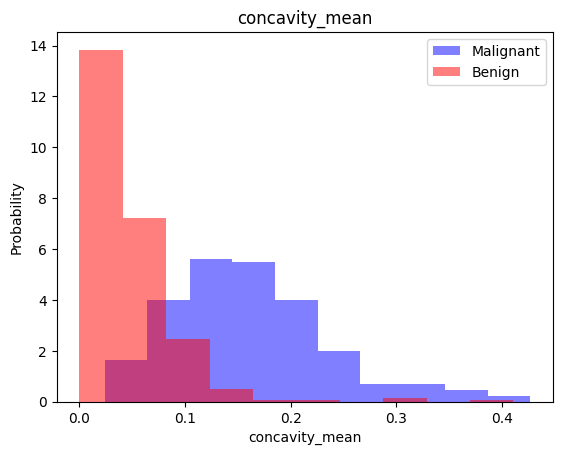

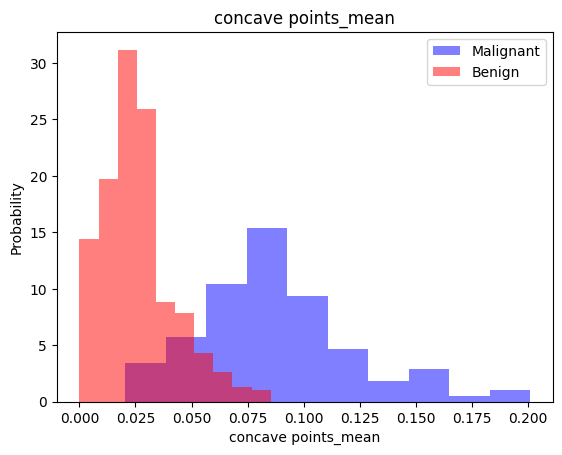

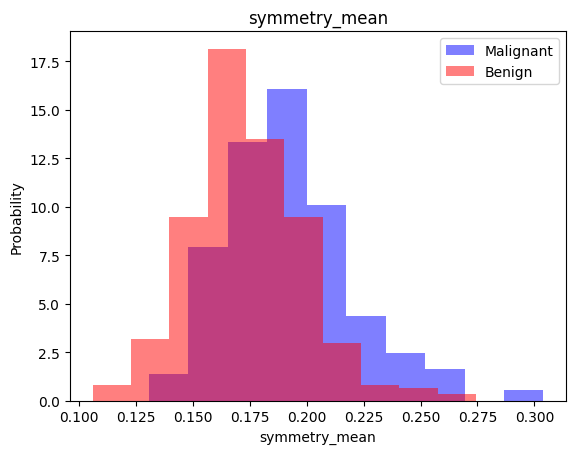

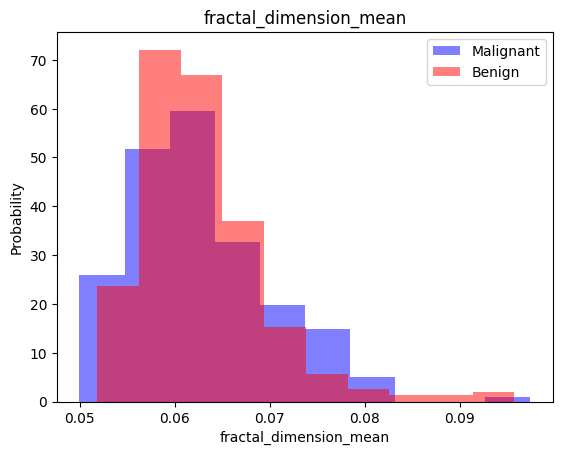

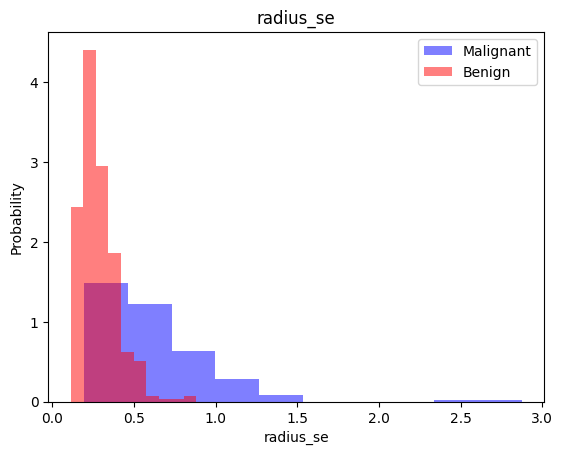

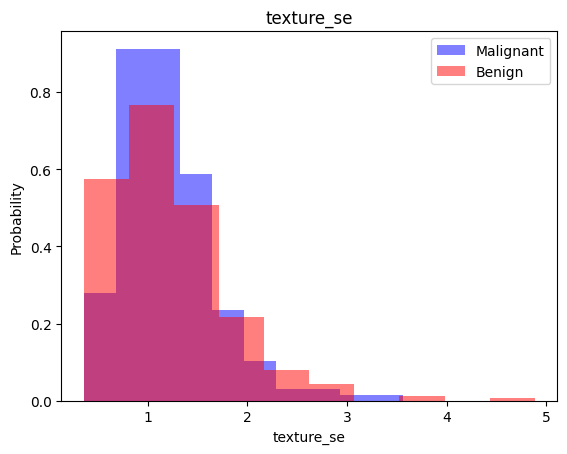

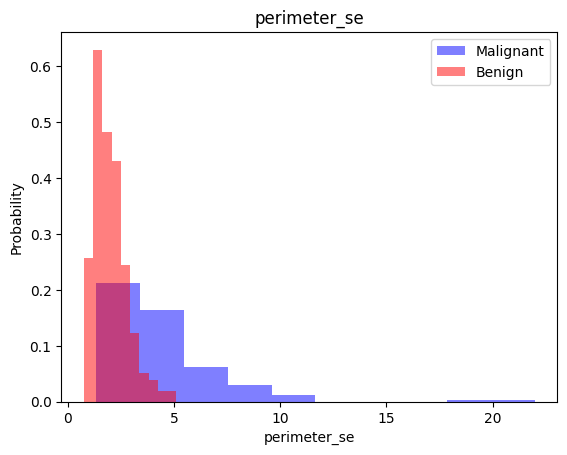

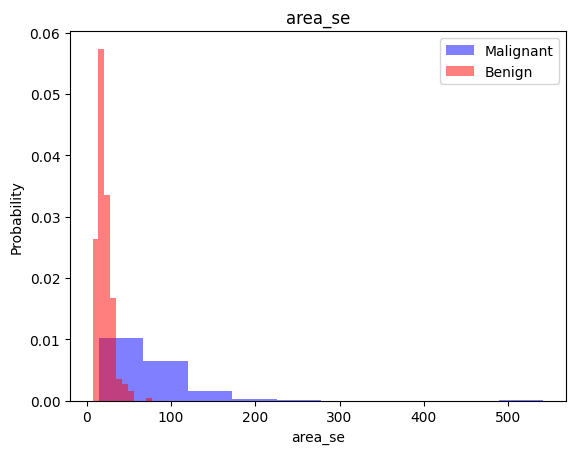

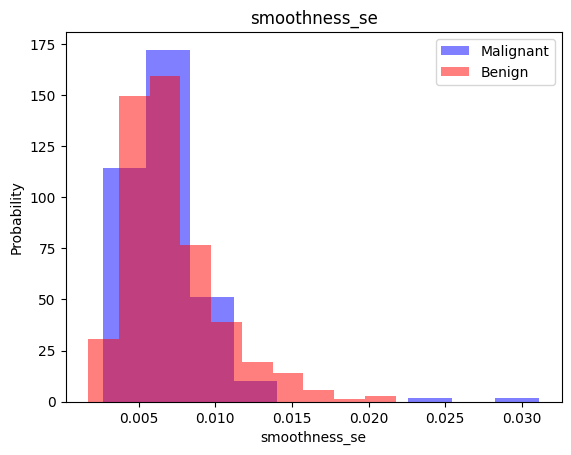

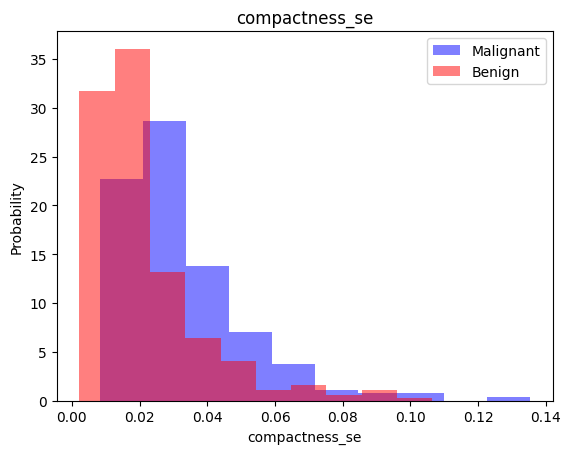

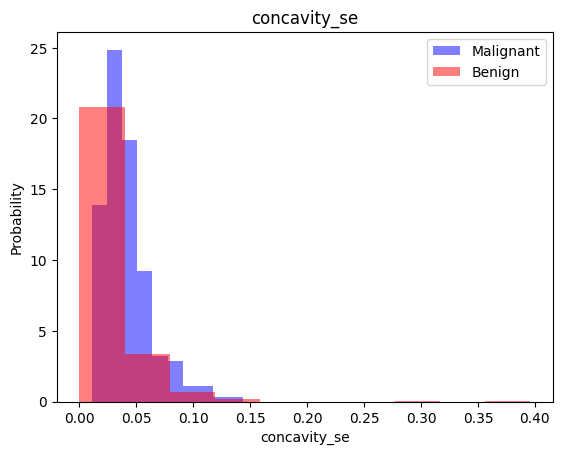

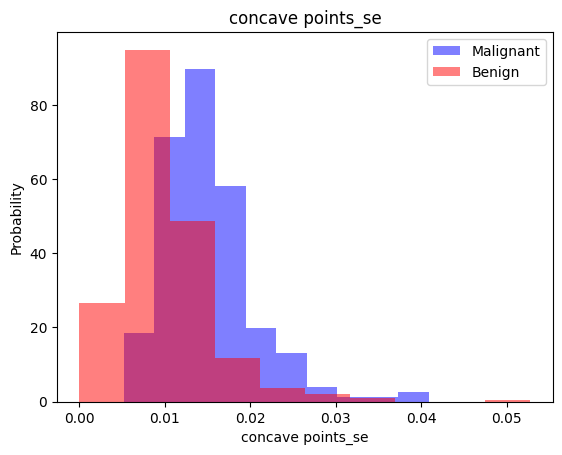

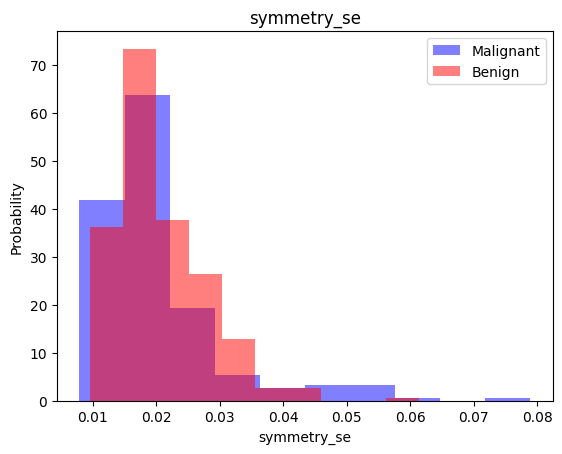

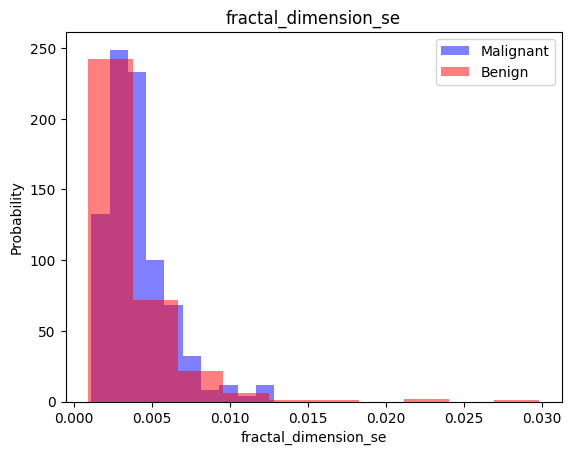

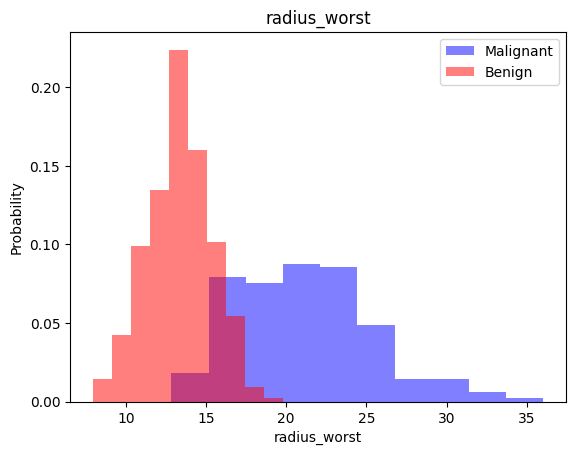

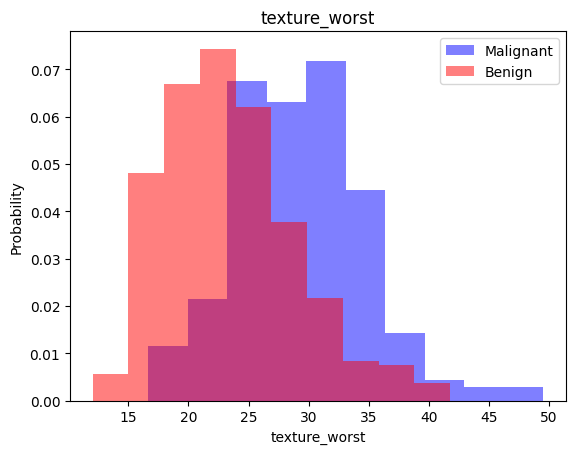

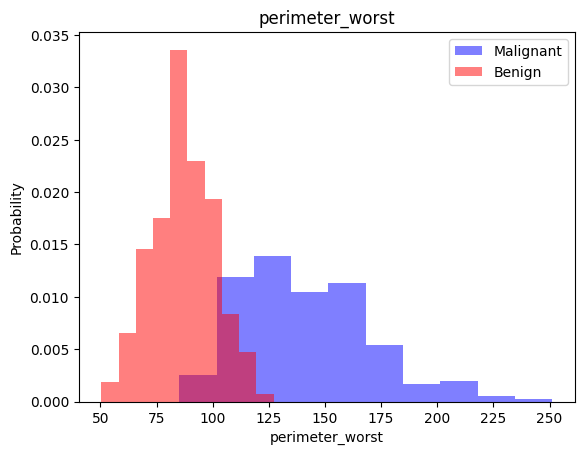

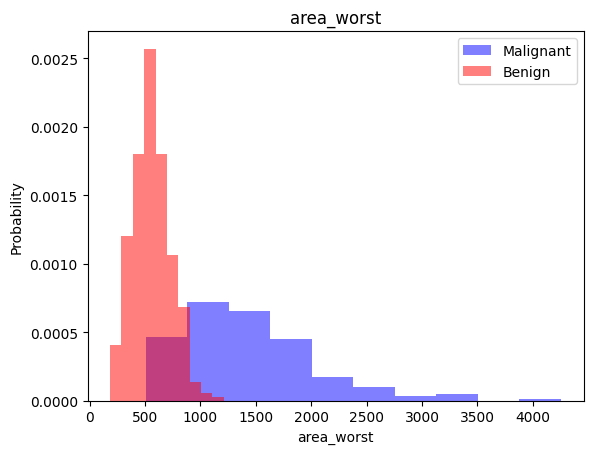

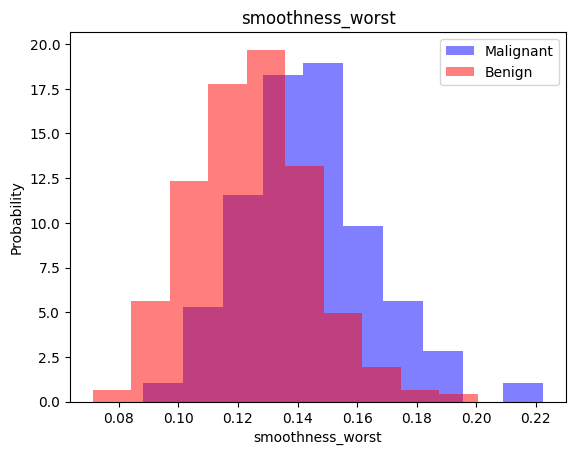

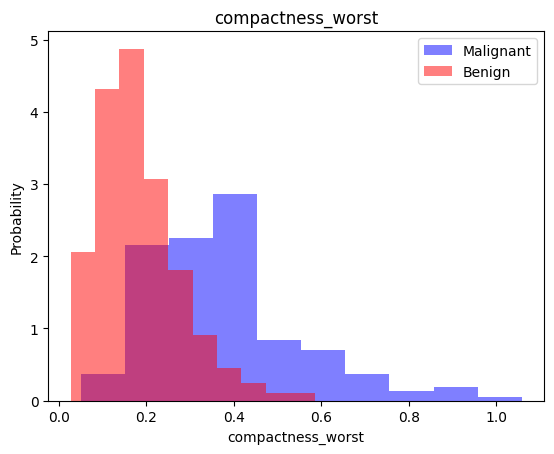

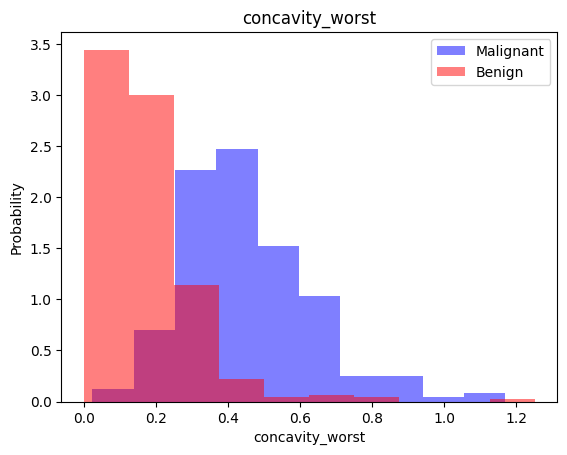

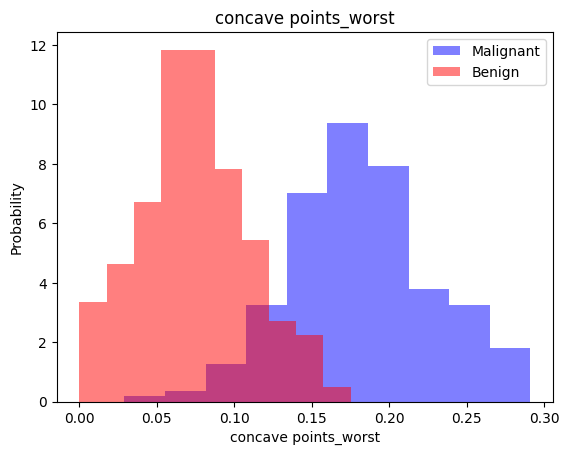

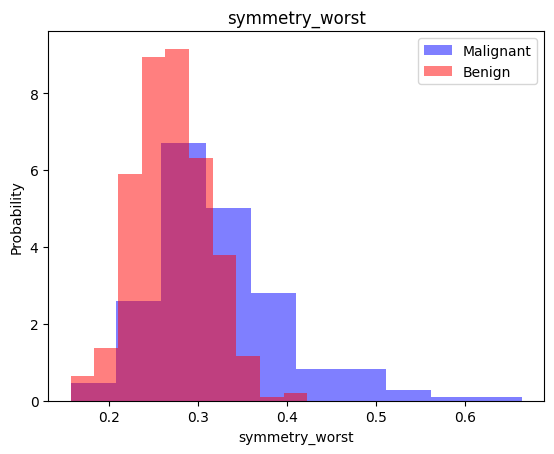

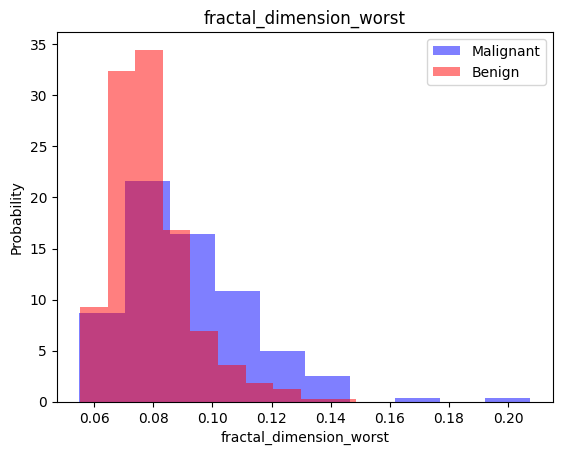

In [160]:
for feature in features:
    plt.hist(df[df['diagnosis']==1][feature], color='blue', label='Malignant', density=True, alpha=0.5)
    plt.hist(df[df['diagnosis']==0][feature], color='red', label='Benign', density=True, alpha=0.5)
    plt.ylabel('Probability')
    plt.xlabel(feature)
    plt.legend()
    plt.title(feature)
    plt.show()

In [161]:
# Get a list of all columns
cols = df.columns.tolist()

# Move the first column to the end
cols = cols[1:] + cols[:1]

# Reorder the DataFrame
df = df[cols]

In [162]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [163]:
train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
266,10.600,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,22.94,78.28,424.8,0.12130,0.25150,0.1916,0.07926,0.2940,0.07587,0
321,20.160,19.66,131.10,1274.0,0.08020,0.08564,0.11550,0.07726,0.1928,0.05096,...,23.03,150.20,1657.0,0.10540,0.15370,0.2606,0.14250,0.3055,0.05933,1
511,14.810,14.70,94.66,680.7,0.08472,0.05016,0.03416,0.02541,0.1659,0.05348,...,17.58,101.70,760.2,0.11390,0.10110,0.1101,0.07955,0.2334,0.06142,0
491,17.850,13.23,114.60,992.1,0.07838,0.06217,0.04445,0.04178,0.1220,0.05243,...,18.42,127.10,1210.0,0.09862,0.09976,0.1048,0.08341,0.1783,0.05871,0
318,9.042,18.90,60.07,244.5,0.09968,0.19720,0.19750,0.04908,0.2330,0.08743,...,23.40,68.62,297.1,0.12210,0.37480,0.4609,0.11450,0.3135,0.10550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,11.610,16.02,75.46,408.2,0.10880,0.11680,0.07097,0.04497,0.1886,0.06320,...,19.67,81.93,475.7,0.14150,0.21700,0.2302,0.11050,0.2787,0.07427,0
31,11.840,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,0.2301,0.07799,...,28.12,119.40,888.7,0.16370,0.57750,0.6956,0.15460,0.4761,0.14020,1
26,14.580,21.53,97.41,644.8,0.10540,0.18680,0.14250,0.08783,0.2252,0.06924,...,33.21,122.40,896.9,0.15250,0.66430,0.5539,0.27010,0.4264,0.12750,1
217,10.200,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.01071,0.1964,0.06315,...,24.47,75.40,403.7,0.09527,0.13970,0.1925,0.03571,0.2868,0.07809,0


In [164]:
test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
230,17.050,19.08,113.40,895.0,0.11410,0.15720,0.19100,0.109000,0.2131,0.06325,...,24.89,133.50,1189.0,0.1703,0.3934,0.5018,0.25430,0.3109,0.09061,1
529,12.070,13.44,77.83,445.2,0.11000,0.09009,0.03781,0.027980,0.1657,0.06608,...,15.77,86.92,549.9,0.1521,0.1632,0.1622,0.07393,0.2781,0.08052,0
10,16.020,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.033230,0.1528,0.05697,...,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,1
252,19.730,19.82,130.70,1206.0,0.10620,0.18490,0.24170,0.097400,0.1733,0.06697,...,25.59,159.80,1933.0,0.1710,0.5955,0.8489,0.25070,0.2749,0.12970,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,15.710,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.059330,0.1816,0.05723,...,19.25,114.30,922.8,0.1223,0.1949,0.1709,0.13740,0.2723,0.07071,0
509,15.460,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.085200,0.1807,0.07083,...,36.33,117.70,909.4,0.1732,0.4967,0.5911,0.21630,0.3013,0.10670,1
108,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.182300,0.2556,0.07039,...,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.29100,0.4055,0.09789,1
99,14.420,19.77,94.48,642.5,0.09752,0.11410,0.09388,0.058390,0.1879,0.06390,...,30.86,109.50,826.4,0.1431,0.3026,0.3194,0.15650,0.2718,0.09353,1


In [165]:
valid

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
393,21.61,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.15620,0.2162,0.06606,...,28.74,172.00,2081.0,0.15020,0.57170,0.70530,0.24220,0.3828,0.10070,1
192,9.72,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,0.06447,...,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559,0
397,12.80,17.46,83.05,508.3,0.08044,0.08895,0.07390,0.04083,0.1574,0.05750,...,21.06,90.72,591.0,0.09534,0.18120,0.19010,0.08296,0.1988,0.07053,0
188,11.81,17.39,75.27,428.9,0.10070,0.05562,0.02353,0.01553,0.1718,0.05780,...,26.48,79.57,489.5,0.13560,0.10000,0.08803,0.04306,0.3200,0.06576,0
437,14.04,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,0.05898,...,21.58,101.20,750.0,0.11950,0.12520,0.11170,0.07453,0.2725,0.07234,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,11.60,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.01777,0.1516,0.05859,...,24.02,82.68,495.1,0.13420,0.18080,0.18600,0.08288,0.3210,0.07863,0
545,13.62,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,29.09,97.58,729.8,0.12160,0.15170,0.10490,0.07174,0.2642,0.06953,0
160,11.75,20.18,76.10,419.8,0.10890,0.11410,0.06843,0.03738,0.1993,0.06453,...,26.21,88.91,543.9,0.13580,0.18920,0.19560,0.07909,0.3168,0.07987,0
507,11.06,17.12,71.25,366.5,0.11940,0.10710,0.04063,0.04268,0.1954,0.07976,...,20.74,76.08,411.1,0.16620,0.20310,0.12560,0.09514,0.2780,0.11680,0


Select the features by writing the column names in the list below:

In [166]:
from imblearn.over_sampling import RandomOverSampler

In [167]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
      ros = RandomOverSampler()
      X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [168]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# **Constructing Logistic Regression Model**



In [177]:
##Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_train_pred_logistic = logistic_model.predict(X_train)

Display the prediction for the Logistic model against the training data (First Model)

In [178]:
results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred_logistic})
results

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
421,1,1
422,1,1
423,1,1
424,1,1


Compute the accuracy of the model against the training set

In [182]:
accuracy_model1 = accuracy_score(y_train, y_train_pred_logistic)
f1_model1 = f1_score(y_train, y_train_pred_logistic)
precision_model1 = precision_score(y_train, y_train_pred_logistic)

print(f"F1 Score: {f1_model1}")
print(f"Precision: {precision_model1}")
print(f"Accuracy on training set: {accuracy_model1*100:.2f}% or {accuracy_model1}")

F1 Score: 0.9905660377358491
Precision: 0.995260663507109
Accuracy on training set: 99.06% or 0.9906103286384976


# **Construct the K-Nearest Neighbors Model**



In [183]:
##Import Required Libraries of KNN here
from sklearn.neighbors import KNeighborsClassifier

Display the prediction for the KNN model against the training data (Second Model)

In [184]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model = knn_model.fit(X_train, y_train)
y_train_pred_knn = knn_model.predict(X_train)

Compute the accuracy of the model against the training set

In [185]:
accuracy_model2 = accuracy_score(y_train, y_train_pred_knn)
f1_model2 = f1_score(y_train, y_train_pred_knn)
precision_model2 = precision_score(y_train, y_train_pred_knn)

print(f"F1 Score: {f1_model2}")
print(f"Precision: {precision_model2}")
print(f"Accuracy on training set: {accuracy_model2*100:.2f}% or {accuracy_model2}")

F1 Score: 0.9813084112149533
Precision: 0.9767441860465116
Accuracy on training set: 98.12% or 0.9812206572769953


# **Constructing Decision Tree Model**



In [186]:
##Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [187]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

Display the prediction for the Decision Tree model against the training data (Third Model)


In [188]:
y_train_pred_tree = tree_model.predict(X_train)

Compute the accuracy of the model against the training set

In [189]:
accuracy_model3 = accuracy_score(y_train, y_train_pred_tree)
f1_model3 = f1_score(y_train, y_train_pred_tree)
precision_model3 = precision_score(y_train, y_train_pred_tree)

print(f"F1 Score: {f1_model3}")
print(f"Precision: {precision_model3}")
print(f"Accuracy on training set: {accuracy_model3*100:.2f}% or {accuracy_model3}")

F1 Score: 1.0
Precision: 1.0
Accuracy on training set: 100.00% or 1.0


# **Results**

Get the highest model for your dataset using if else condition on every f1 score / accuracy / precision of your model.

In [194]:
if f1_model1 > f1_model2 and f1_model1 > f1_model3:
   f1_best_model = "Model 1"
elif f1_model2 > f1_model1 and f1_model2 > f1_model3:
   f1_best_model = "Model 2"
else:
   f1_best_model = "Model 3"

if precision_model1 > precision_model2 and precision_model1 > precision_model3:
   precision_best_model = "Model 1"
elif precision_model2 > precision_model1 and precision_model2 > precision_model3:
   precision_best_model = "Model 2"
else:
   precision_best_model = "Model 3"

if accuracy_model1 > accuracy_model2 and accuracy_model1 > accuracy_model3:
   accuracy_best_model = "Model 1"
elif accuracy_model2 > accuracy_model1 and accuracy_model2 > accuracy_model3:
   accuracy_best_model = "Model 2"
else:
   accuracy_best_model = "Model 3"

# **CONCLUSION**
Create conclusion and result based on the output of every model.

In [195]:
print(f'Best F1 Score: {f1_best_model}')
print(f'Best Precision: {precision_best_model}')
print(f'Best Accuracy: {accuracy_best_model}')

Best F1 Score: Model 3
Best Precision: Model 3
Best Accuracy: Model 3


#CONCULSION

he Decision Tree model (Model 3) was found to be the best-performing classification model overall after three models were evaluated on the provided dataset: Logistic Regression (Model 1), K-Nearest Neighbors (Model 2), and Decision Tree (Model 3).

The fact that Model 3 obtained the highest results on all three evaluation metrics—F1 Score, Precision, and Accuracy—supports this conclusion. This shows that the Decision Tree model demonstrated both high recall (reducing false negatives) and good precision (reducing false positives), correctly classifying occurrences in the dataset.

The Decision Tree model finally outperformed K-Nearest Neighbors and Logistic Regression, despite their encouraging performances.  To enhance these models' performance on this specific dataset, more research and adjustment may be required.

 Because the Decision Tree model performs better overall in terms of F1 Score, Precision, and Accuracy, it is advised for this classification assignment.  It is crucial to remember that these findings are unique to the evaluation measures and dataset in question.  Conclusions may vary depending on the evaluation criteria and datasets used.